# **Praktikum 9 - Perceptron dan Artificial Neural Network (ANN)**


**Nama  : Novita Dwi Rahmadani**

**Kelas : TI-3F**

**NIM   : 2141720050**

### **Praktikum 1 - Klasifikasi iris dengan Perceptron**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Langkah 1 - Import Library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Langkah 2 - Load Data dan Visualisasi**

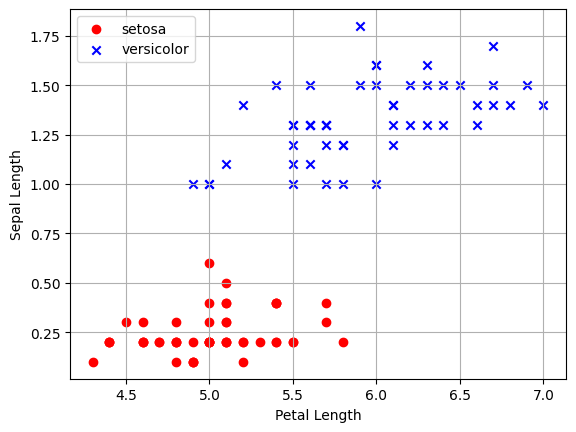

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/iris2.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**Langkah 3 - Membuat Kelas Perceptron**

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

**Langkah 4 - Pilih Data dan Encoding Label**

In [ ]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

**Langkah 5 - Fitting Model**

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

**Langkah 6 - Visualisasi Nilai Error Per Epoch**

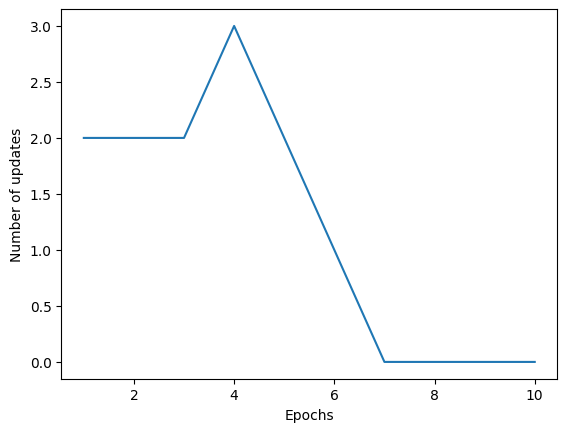

In [ ]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

**Langkah 7 - Visualiasasi Decision Boundary**

In [ ]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

**Praktikum 2 - Klasifikasi Berita dengan Perceptron**

**Langkah 1 - Import Library**

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

**Langkah 2 - Pilih Label dan Split Data**

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

### **Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron**

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



### **Praktikum 3- Nilai Logika XOR dengan MLP**

**Langkah 1 - Import Library**

In [ ]:
from sklearn.neural_network import MLPClassifier

**Langah 2 - Buat Data**

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

**Langkah 3 - Fit Model**

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

**Langkah 4 - Prediksi**

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


### **Praktikum 4 - Klasifikasi dengan ANN**

In [ ]:
pip install tensorflow

**Langkah 1 - Import Library**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

**Langkah 2 - Load Data**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ML/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


**Langkah 3 - Encoding Data Kategorikal**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

**Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


**Langkah 5 - Split Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Langkah 6 - Scaling Fitur**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Membuat Model ANN**

**Langkah 1 - Inisiasi Model ANN**

In [ ]:
ann = tf.keras.models.Sequential()

**Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama**

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Langkah 3 - Membuat Hidden Layer Kedua**

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Langkah 4 - Membuat Output Layer**

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### **Training Model**

**Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN**

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Langkah 2 - Fitting Model**

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.6176 - accuracy: 0.6476
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4586 - accuracy: 0.7987
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4339 - accuracy: 0.8061
Epoch 4/100
250/250 [==============================] - 2s 6ms/step - loss: 0.4227 - accuracy: 0.8139
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4157 - accuracy: 0.8190
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4103 - accuracy: 0.8234
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4049 - accuracy: 0.8260
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3975 - accuracy: 0.8342
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3877 - accuracy: 0.8385
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3769 - accura

**Membuat Prediksi**

**Modelkan Data Baru dan Buat Prediksi**

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 110ms/step
[[False]]


**Prediksi Dengan Data Testing**

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


**Cek Akurasi dan Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1500   95]
 [ 193  212]]


0.856

### **Tugas**

1. Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
2. Anda diperbolehkan melakukan eksplorasi terhadap,
  - Metode pra pengolahan
  - Pemilihan fitur
  - Arsitektur ANN
  - Fungsi Aktiviasi
3. ANN diimplementasikan dengan menggunakan tensorflow.
4. DIKERJAKAN SECARA BERKELOMPOK
5. JELASKAN HASIL YANG ANDA DAPATKAN,
  - AKURASI
  - CONFUSION MATRIX
  - KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

**Langkah 1 - Import Library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow
import keras

from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

import warnings
warnings.filterwarnings('ignore')
#cuda 12.1 not recognized by tf :(
%matplotlib inline
# print(tensorflow.__version__)

**Langlah 2 - Menyiapkkan Dataset MNIST**

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


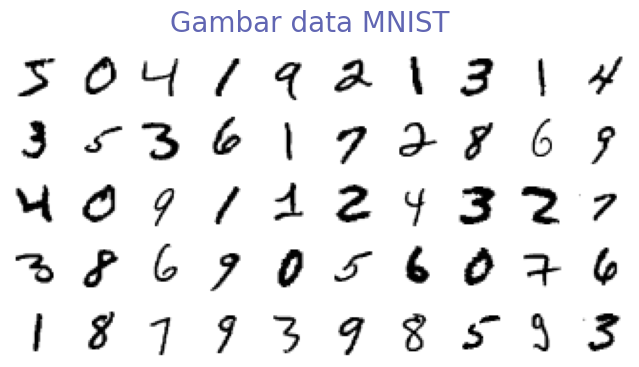

In [ ]:
# Menampilkan gambar dari data MNIST

fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize=(8,4), subplot_kw={'xticks': [], 'yticks': []})
for row in range(0,5):
    for col in range(0,10):
        myid = (10*row) + col # (ncols*rows) + cols

        ax[row,col].imshow( x_train[myid], cmap=plt.cm.binary ) # W,H,C
        ax[row,col].axis('off')

plt.suptitle("Gambar data MNIST", size=20, color="#6166B3")

plt.show()

**Mencetak Informasi Dataset MNIST**

In [ ]:
print("bentuk data: ",x_train.shape)
print("nilai max data: ",x_train[0].max())

bentuk data:  (60000, 28, 28)
nilai max data:  255


**Reshape dan Normalisasi data**

In [ ]:
# ubah bentuk data dan skala pixel menjadi (n,w*h)
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255
# sama juga untuk x_test
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

print("bentuk data setelah: ",x_train.shape)
print("nilai max data setelah: ",x_train[0].max())

bentuk data setelah:  (60000, 784)
nilai max data setelah:  1.0


**Pemodelan ANN**


In [ ]:
# ubah bentuk label menjadi kategorical untuk digunakan tensorflow nantinya
y_train = tensorflow.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test , num_classes=10)

In [ ]:
# pembuatan hidden layer
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,MaxPool2D,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Concatenate,UpSampling2D
from tensorflow.keras.models import Model

nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(10, activation='softmax'))
print(nn_model)

In [ ]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Pelatihan dan Pengujian Dataset**

In [ ]:
history = nn_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5092 - accuracy: 0.8488
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3143 - accuracy: 0.9081
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2698 - accuracy: 0.9186
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2505 - accuracy: 0.9239
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2353 - accuracy: 0.9277
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2236 - accuracy: 0.9309
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2146 - accuracy: 0.9328
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2113 - accuracy: 0.9338
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2015 - accuracy: 0.9374
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.198

**Hasil Visualisasi Evaluasi**

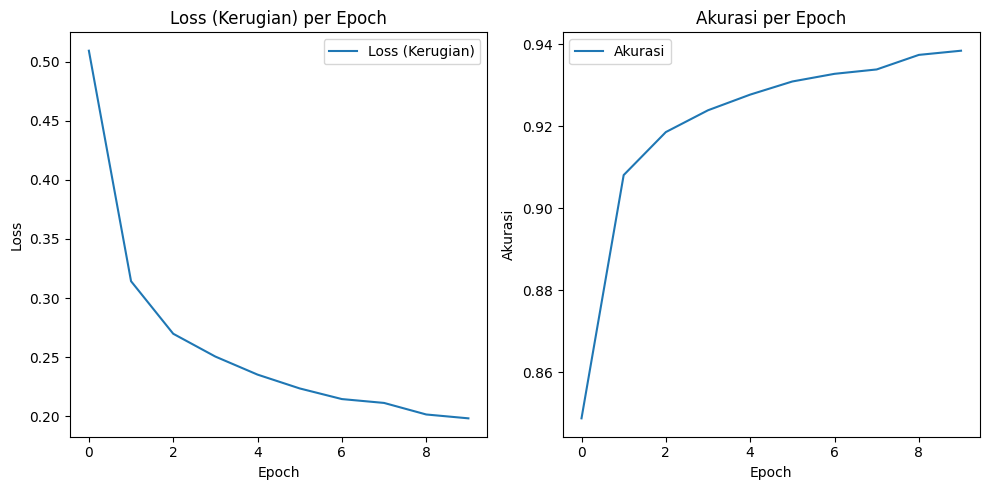

In [ ]:
# Visualisasi loss (kerugian)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss (Kerugian)')
plt.title('Loss (Kerugian) per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Visualisasi akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Akurasi')
plt.title('Akurasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

**Confusion Matrix**

In [ ]:
# Menghitung akurasi model pada data pengujian menggunakan prediksi yang dihasilkan sebelumnya
y_prob = nn_model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

313/313 [==============================] - 1s 3ms/step


0.9626

In [ ]:
# Menghitung confusion matrix berdasarkan label sebenarnya (y_test) dan label prediksi (y_pred)
from sklearn.metrics import confusion_matrix  # for evaluating results
confusion_array = confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion_array

array([[ 967,    0,    1,    1,    1,    2,    4,    2,    2,    0],
       [   0, 1119,    6,    1,    0,    0,    4,    1,    4,    0],
       [   5,    0, 1003,    4,    4,    0,    3,    8,    5,    0],
       [   2,    0,   10,  971,    1,   13,    0,    8,    4,    1],
       [   0,    0,    6,    0,  949,    0,   12,    1,    2,   12],
       [   5,    0,    0,   15,    3,  850,    6,    2,    9,    2],
       [   7,    3,    2,    0,    3,    6,  936,    0,    1,    0],
       [   2,    7,   16,   10,    5,    0,    0,  975,    1,   12],
       [  10,    6,    6,    9,    5,   12,    7,    9,  905,    5],
       [   5,    7,    0,    8,   19,    8,    0,    9,    2,  951]])

<Axes: >

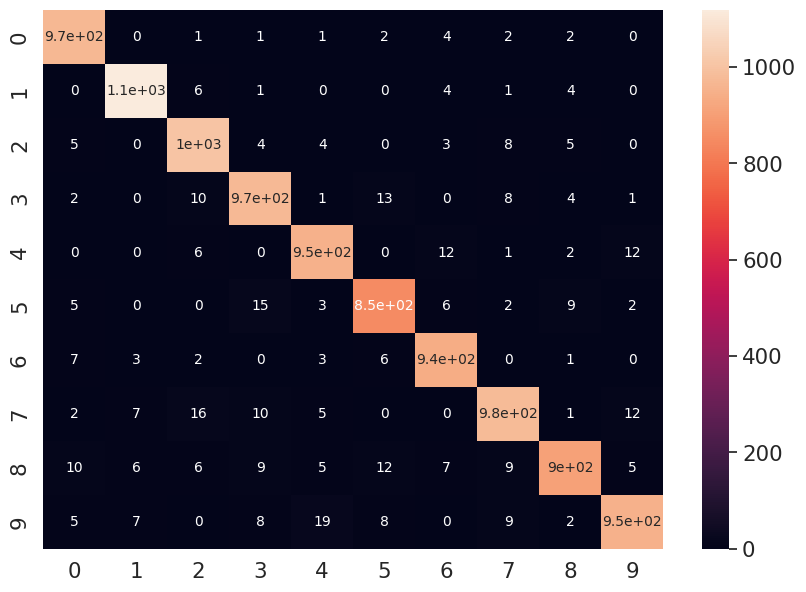

In [ ]:
# Membuat visualisasi Confusion Matrix
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(confusion_array, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size